# DSCI 100 FINAL PROJECT

## 1. Introduction

- provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
- clearly state the question you tried to answer with your project
- identify and fully describe the dataset that was used to answer the question

Video games. Of course we all know what it is. It is one of the major hobbies of people and a major activity of how they spend their free time and connect with other fellow gamers. With the invention of video games, it comes with a benefit for researchers and observers. They are now able to study with digital detailed records called game telemetry. Game telemetry records the data of the player themselves and what they do in the game, such as the duration of each play session and how they communicate to one another. This data is very useful for research because it shows real life behavior in a virtual setting instead of relying only on surveys or controlled lab studies.

In this project, we analyze data from a research Minecraft server run by a computer science group at the University of British Columbia led by Professor Frank Wood. The server is designed for studying how people play games. Every time a player logs in, the server records information about their activity. This includes the times they start and end a session and the actions they take while playing. The research team uses these records to understand how different players behave, how long they stay active, and what kinds of activities they prefer.

Running a server like this requires planning and resources. The research group needs to recruit enough players to gather meaningful data, but they also need to make sure the server can handle the number of active users. One tool they use to stay connected with players is a game related newsletter that players can choose to subscribe to. Understanding which players are more likely to subscribe can help the research group focus their recruitment efforts and manage server capacity more effectively.

This leads to the broad question of the project: What player characteristics and behaviours are most predictive of subscribing to a game related newsletter, and how do these features differ between different types of players? The goal is to build a model that predicts whether a player will subscribe based on their activity on the server. After that, we can look at the most important features and see how they vary across different groups of players, such as casual players or highly active players.

To answer this question, we use two related datasets called players.csv and sessions.csv. These two files work together to give a complete picture of player behaviour.

The players.csv file has one row for each unique player in the study. It contains general information such as a player ID that has been anonymized. It also includes summary features that describe a player's overall activity. Most importantly, this file contains the variable subscribed_newsletter, which tells us whether the player subscribed. Other features in this file include total playtime, the number of sessions played, and counts of major actions such as blocks placed or items crafted. These summary features give us a broad idea of how engaged each player is.

The sessions.csv file contains one row for every session a player completes. It includes the start time and end time of the session, the length of the session, and detailed counts of actions performed during that session. Since some players only log in once while others may play many times, this file shows the full range of player behaviour. It also lets us calculate new features such as the average session length for each player, how many days they were active, and how recently they last played.
Both datasets use the same player_id variable, which allows us to connect the two files. We can combine detailed session data with the summary information in players.csv to build a complete dataset for modelling. With these combined data, we can explore what behaviours are linked to newsletter subscription and how these behaviours vary between different player types. The goal is to help the research group better understand their players and make more informed decisions about recruitment and resource planning.


## 2. Methods & Results

Methods & Results:
describe the methods you used to perform your analysis from beginning to end that narrates the analysis code.
our report should include code which:
- loads data 
- wrangles and cleans the data to the format necessary for the planned analysis
- performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 
- creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
- performs the data analysis
- creates a visualization of the analysis 
- note: all figures should have a figure number and a legend


In [10]:
library(tidyverse)

In [11]:
players <- read_csv("/home/jovyan/work/ubcdsci100finalproject/data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [66]:
player_data <- players |>
    select(Age, gender, played_hours, subscribe) |>
    filter(!is.na(Age)) |>
    mutate(gender = as_factor(gender),
           subscribe = as_factor(subscribe)) 

player_data

Age,gender,played_hours,subscribe
<dbl>,<fct>,<dbl>,<fct>
9,Male,30.3,TRUE
17,Male,3.8,TRUE
17,Male,0.0,FALSE
21,Female,0.7,TRUE
21,Male,0.1,TRUE
17,Female,0.0,TRUE
19,Female,0.0,TRUE
21,Male,0.0,FALSE
47,Male,0.1,TRUE


In [39]:
average_hr_played <- player_data |> 
  summarize(average_hr_played = round(mean(played_hours, na.rm = TRUE), 2))
average_hr_played


average_hr_played
<dbl>
5.9


In [38]:
average_gender <- player_data |>
  group_by(gender) |>
  summarize(count = n()) |>
  mutate(percentage = round(count / sum(count) * 100, 2))
average_gender

gender,count,percentage
<fct>,<int>,<dbl>
Male,124,63.92
Female,37,19.07
Non-binary,15,7.73
Prefer not to say,11,5.67
Agender,2,1.03
Two-Spirited,5,2.58


In [37]:
average_age <- player_data |>
    summarize(average_age = round(mean(Age, na.rm = TRUE), 2))
average_age

average_age
<dbl>
21.14


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 12
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

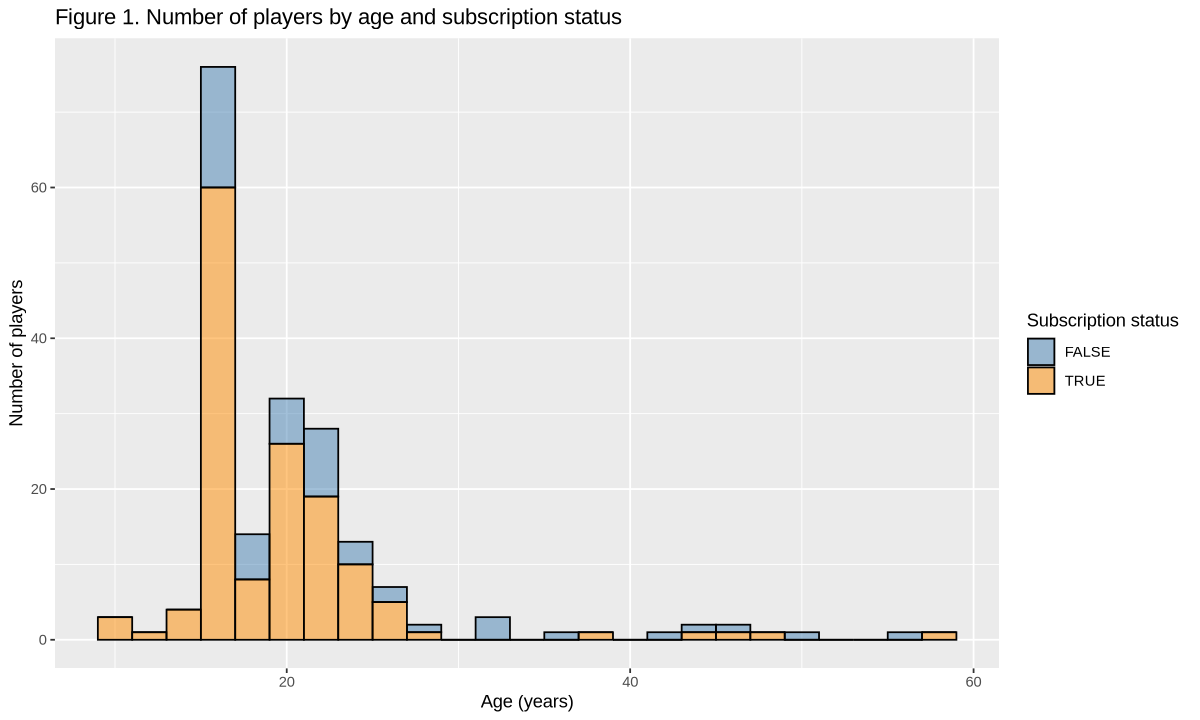

In [84]:
options(repr.plot.height = 6, repr.plot.width = 10)
age_hist <- player_data |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_histogram(alpha = 0.5, binwidth = 2, position = "stack", color = "black") +
    labs(x = "Age (years)", y = "Number of players",
         fill = "Subscription status") +
    ggtitle("Figure 1. Number of players by age and subscription status") +
    scale_fill_manual(values = c("steelblue","darkorange"))
    theme(text = element_text(size = 12))

age_hist

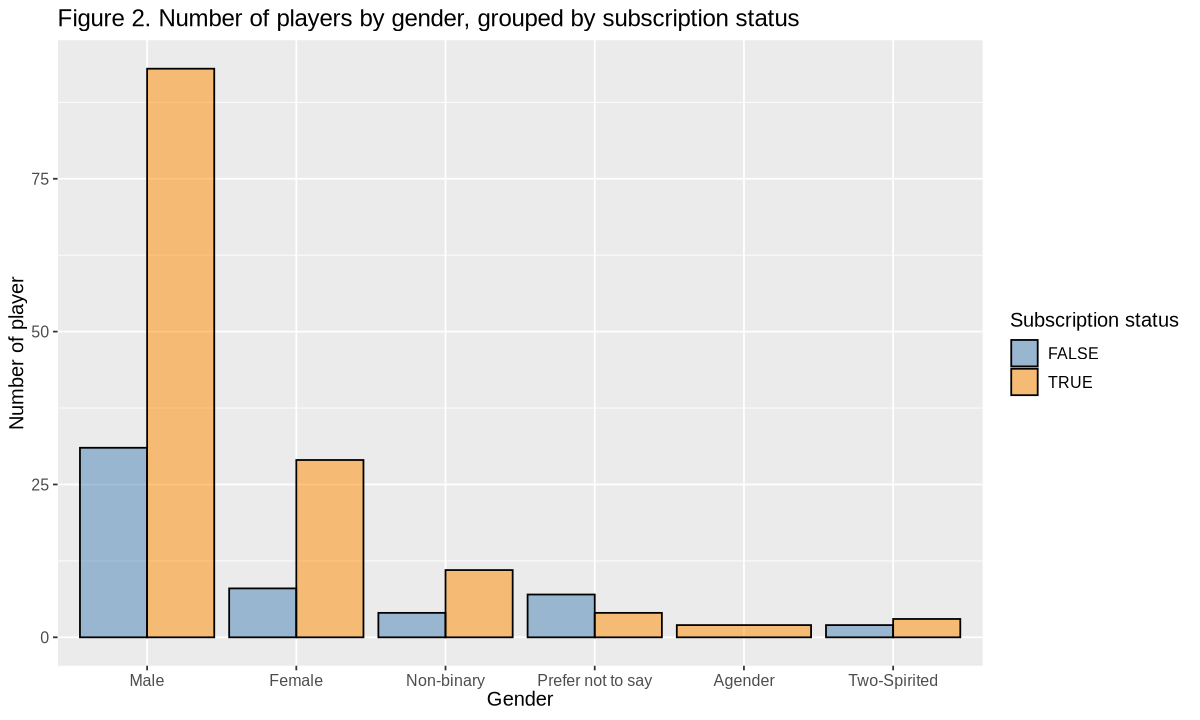

In [90]:
options(repr.plot.height = 6, repr.plot.width = 10)
gender_bar <- player_data |>
    ggplot(aes(x = gender, fill = subscribe)) +
    geom_bar(alpha = 0.5, position = "dodge", color = "black") +
    labs(x = "Gender", y = "Number of player", fill = "Subscription status") +
    ggtitle("Figure 2. Number of players by gender, grouped by subscription status") +
    scale_fill_manual(values = c("steelblue","darkorange")) +
    theme(text = element_text(size = 12))

gender_bar

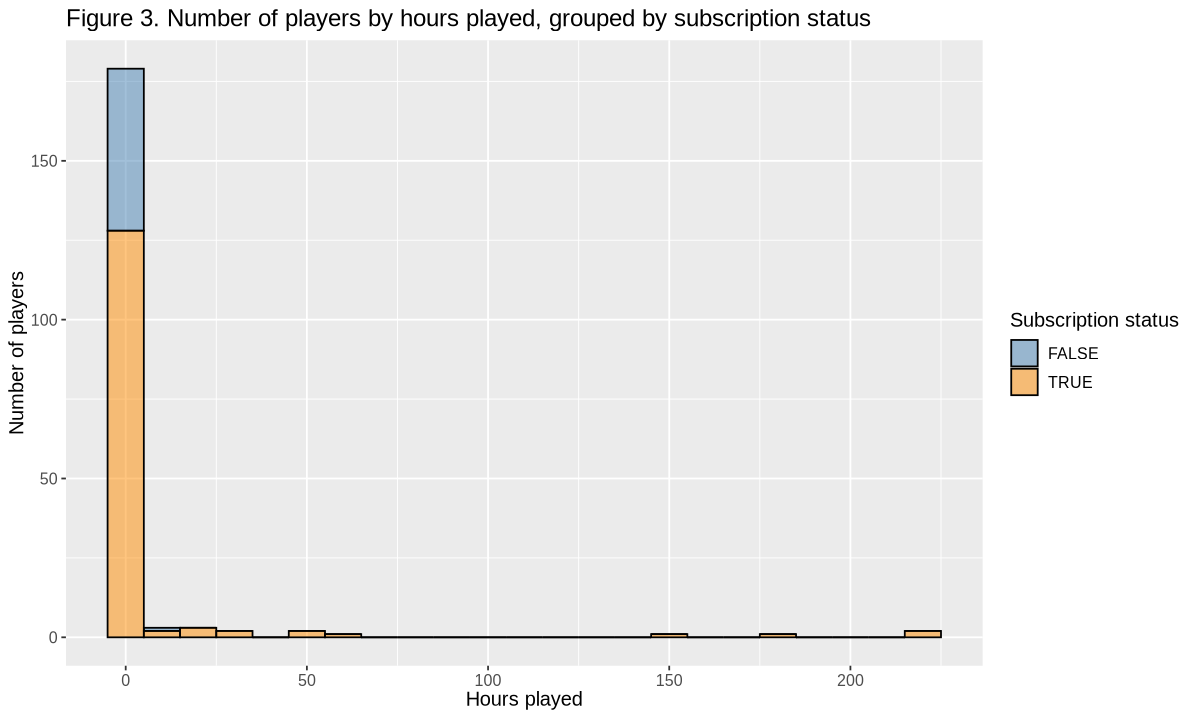

In [91]:
options(repr.plot.height = 6, repr.plot.width = 10)

hours_hist <- player_data |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
    geom_histogram(binwidth = 10, position = "stack", color = "black", alpha = 0.5) +
    labs(x = "Hours played", y = "Number of players", fill = "Subscription status") +
    ggtitle("Figure 3. Number of players by hours played, grouped by subscription status") +
    scale_fill_manual(values = c("steelblue", "darkorange")) +
    theme(text = element_text(size = 12))


hours_hist

List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 12
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

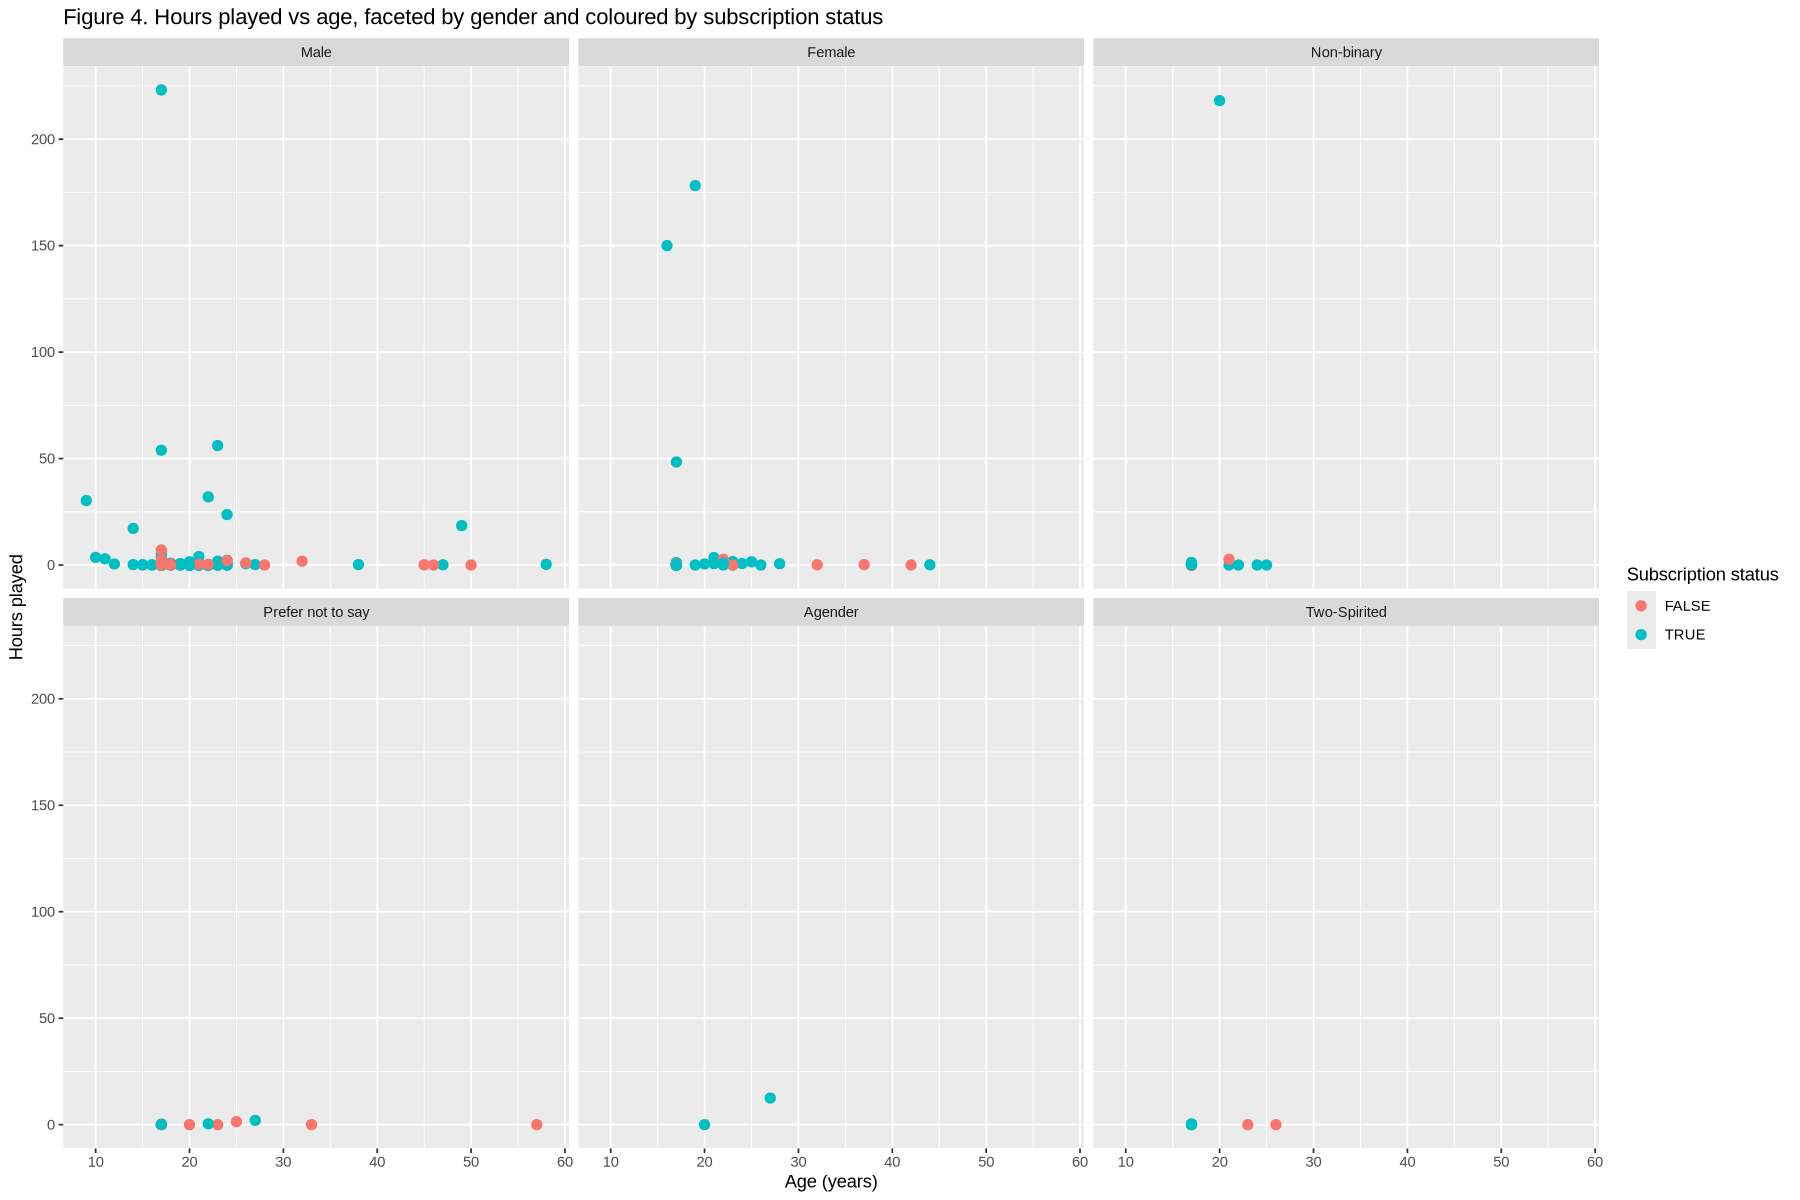

In [105]:
options(repr.plot.height = 10, repr.plot.width = 15)
combined_plot <- player_data |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(alpha = 1, size = 2.5) +
    facet_wrap(~ gender) +
    labs(x = "Age (years)", y = "Hours played", color = "Subscription status") +
    ggtitle("Figure 4. Hours played vs age, faceted by gender and coloured by subscription status") +
    scale_fill_manual(values = c("steelblue", "darkorange"))
    theme(text = element_text(size = 12))

combined_plot

## 3. Discussion

- summarize what you found
- discuss whether this is what you expected to find
- discuss what impact could such findings have
- discuss what future questions could this lead to

## 4. References